# Tokens

In [72]:
#Initial Imports
import os
import pandas as pd

In [73]:
from dotenv import load_dotenv
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from vaderSentiment import SentimentIntensityAnalyzer
from pathlib import Path
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\annmi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [74]:
load_dotenv()
%matplotlib inline

In [87]:
#Import Data from .CSV files
csv_path = aapl_file = Path('Web-Scraping-APP/AAPL_HEADLINES.csv')
# csv_path = (r'C:\Users\annmi\OneDrive\Desktop\Class\Project\Group1_Project2\Web-Scraping-APP\AAPL_HEADLINES.csv')

In [88]:
aapl_headlines = pd.read_csv(csv_path)
aapl_headlines.head()

Headline  \
0  Apple Inc. stock falls Monday, underperforms m...   
1  Big Tech Stocks Are Lagging Today. Why They’ll...   
2  As Apple releases its new line of Macs, the bi...   
3  In the Midst of Election Uncertainty, Younger ...   
4  Berkshire Buybacks Hit Record $9 Billion in Th...   

                           Date  
0  Nov. 9, 2020 at 4:30 p.m. ET  
1  Nov. 9, 2020 at 1:45 p.m. ET  
2  Nov. 9, 2020 at 1:18 p.m. ET  
3  Nov. 6, 2020 at 9:21 p.m. ET  
4  Nov. 7, 2020 at 8:49 a.m. ET

In [77]:
#Initial Imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [78]:
# Expand the default stopwords list if necessary
sw_addons={'char', 'colleague', 'day', 'another', 'edition', 'writes', 'whats','going', 'new', 'could', 'say'}

In [79]:
lemmatizer=WordNetLemmatizer()

def tokenizer(text):
    '''Remove Characters'''
    regex = re.compile("[^a-zA-Z ]")
    text = regex.sub('', text)
    '''Create a list of the words'''
    words=word_tokenize(text)
    '''Remove the stop words'''
    sw = set(stopwords.words('english')).union(set(punctuation)).union(sw_addons)
    '''Lemmatize Words into root words'''
    lem = [lemmatizer.lemmatize(word) for word in words]
    '''Convert the words to lowercase'''
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [80]:
def add_tokens(df):
    '''Apply tokenizer to Headlines'''
    df['Tokens']=df['Headline'].apply(tokenizer)
    '''Reset Index'''
    df=df.reset_index()
    '''Reset Index to Date'''
    df=df.set_index('Date', inplace=True)
    return df


In [81]:
add_tokens(aapl_headlines)
aapl_headlines.head()

Headline  \
0  Apple Inc. stock falls Monday, underperforms m...   
1  Big Tech Stocks Are Lagging Today. Why They’ll...   
2  As Apple releases its new line of Macs, the bi...   
3  In the Midst of Election Uncertainty, Younger ...   
4  Berkshire Buybacks Hit Record $9 Billion in Th...   

                           Date  \
0  Nov. 9, 2020 at 4:30 p.m. ET   
1  Nov. 9, 2020 at 1:45 p.m. ET   
2  Nov. 9, 2020 at 1:18 p.m. ET   
3  Nov. 6, 2020 at 9:21 p.m. ET   
4  Nov. 7, 2020 at 8:49 a.m. ET   

                                              Tokens  
0  [apple, inc, stock, fall, monday, underperform...  
1  [big, tech, stocks, lagging, today, theyll, fi...  
2  [apple, release, line, macs, biggest, benefici...  
3  [midst, election, uncertainty, younger, trader...  
4  [berkshire, buybacks, hit, record, billion, th...

# Most Frequent Tokens

In [56]:
#Initial Imports
from collections import Counter

In [61]:
#Create the Tokenizer Function
def token_count(df, N=20):
    """Returns the top N tokens from the frequency count"""
    '''Creates a Big String'''
    big_string=df["Headline"].str.cat()
    '''Runs Tokenizer on Big String'''
    df_tokenized=tokenizer(big_string)
    '''Counts Tokens'''
    return Counter(df_tokenized).most_common(N)

In [62]:
token_count(aapl_headlines)

[('stock', 2770),
 ('apple', 1307),
 ('market', 739),
 ('tech', 551),
 ('iphone', 546),
 ('dow', 429),
 ('point', 395),
 ('earnings', 394),
 ('share', 392),
 ('price', 365),
 ('gain', 361),
 ('record', 327),
 ('target', 322),
 ('big', 314),
 ('analyst', 300),
 ('fall', 285),
 ('us', 271),
 ('apples', 251),
 ('trade', 250),
 ('buy', 238)]

In [60]:
#Function if there are different column titles
def token_count(text_column, N=20):
    """Returns the top N tokens from the frequency count"""
    '''Creates a Big String'''
    big_string=text_column.str.cat()
    '''Runs Tokenizer on Big String'''
    df_tokenized=tokenizer(big_string)
    '''Counts Tokens'''
    return Counter(df_tokenized).most_common(N)

token_count(aapl_headlines['Headline'])

[('stock', 2770),
 ('apple', 1307),
 ('market', 739),
 ('tech', 551),
 ('iphone', 546),
 ('dow', 429),
 ('point', 395),
 ('earnings', 394),
 ('share', 392),
 ('price', 365),
 ('gain', 361),
 ('record', 327),
 ('target', 322),
 ('big', 314),
 ('analyst', 300),
 ('fall', 285),
 ('us', 271),
 ('apples', 251),
 ('trade', 250),
 ('buy', 238)]

# Word Clouds

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [36]:
#Create WC function
def word_cloud(df):
    '''Create Big String'''
    big_string=df['Headline'].str.cat()
    '''Tokenize Big String'''
    df_tokenized=tokenizer(big_string)
    '''Create Second Big String of Tokenized Words'''
    wc_string=' '.join(df_tokenized)
    '''Set the Word Cloud Object'''
    nlp_wc = WordCloud(width=1200, height=800, max_words=50).generate(wc_string)
    return plt.imshow(nlp_wc)

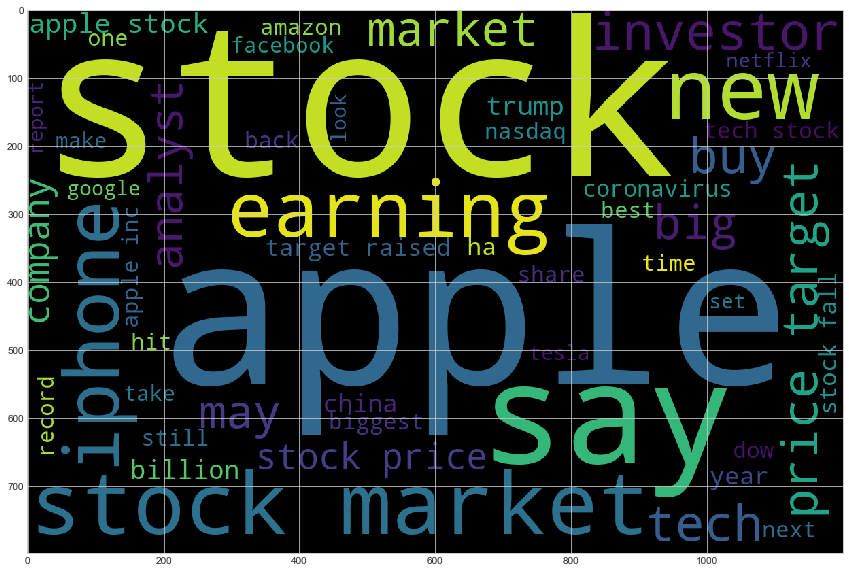

In [37]:
word_cloud(aapl_headlines)

In [38]:
# WC function for different column titles
def word_cloud(text_column):
    '''Create Big String'''
    big_string=text_column.str.cat()
    '''Tokenize Big String'''
    df_tokenized=tokenizer(big_string)
    '''Create Second Big String of Tokenized Words'''
    wc_string=' '.join(df_tokenized)
    '''Set the WordCloud Object'''
    nlp_wc = WordCloud(width=1200, height=800, max_words=50).generate(wc_string)
    return plt.imshow(nlp_wc)

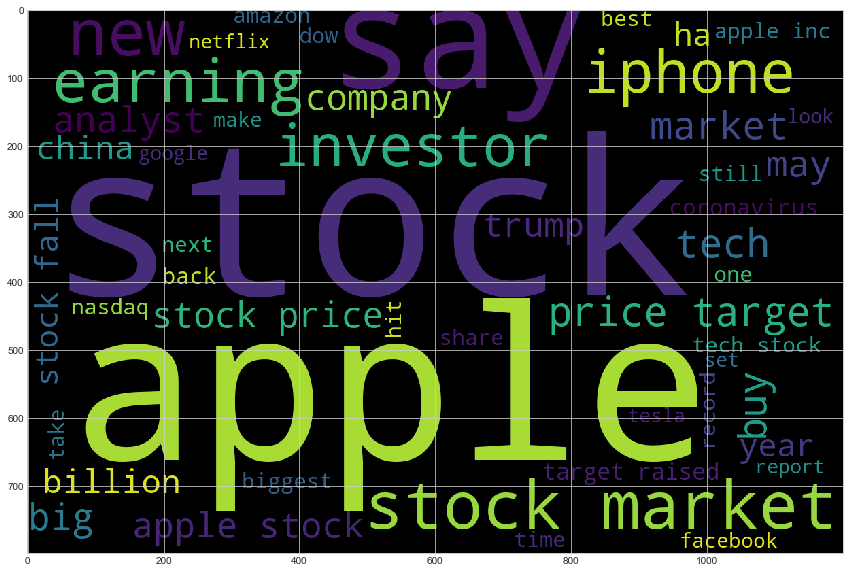

In [39]:
word_cloud(aapl_headlines['Headline'])

# NER

In [109]:
#Imports
import spacy
from spacy import displacy

In [110]:
# Create NER function
def named_entity_recognition(df):
    '''Load the spaCy model'''
    nlp = spacy.load('en_core_web_sm')
    '''Create a big string'''
    big_string=df['Headline'].str.cat()
    '''Run Processor'''
    processed_doc=nlp(big_string)
    '''Add Title'''
    processed_doc.user_data['title']='Named Entity Recognition'
    '''Render the visualization'''
    return displacy.render(processed_doc, style='ent')

In [111]:
#Create NER function for column titles
def named_entity_recognition(text_column):
    '''Load the spaCy model'''
    nlp = spacy.load('en_core_web_sm')
    '''Create a big string'''
    big_string=text_column.str.cat()
    '''Run Processor'''
    processed_doc=nlp(big_string)
    '''Add Title'''
    processed_doc.user_data['title']='Named Entity Recognition'
    '''Render the visualization'''
    return displacy.render(processed_doc, style='ent')

In [112]:
named_entity_recognition(aapl_headlines['Headline'])